In [8]:
import xgboost
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
os.listdir("../Scikitlearn/Gradient Boosting/rossmann-store-sales")

['.ipynb_checkpoints',
 'rossmann-store-sales.zip',
 'sample_submission.csv',
 'store.csv',
 'test.csv',
 'train.csv']

In [57]:
store_df = pd.read_csv("../Scikitlearn/Gradient Boosting/rossmann-store-sales/store.csv", low_memory=False)
store_df.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [56]:
train_df = pd.read_csv("../Scikitlearn/Gradient Boosting/rossmann-store-sales/train.csv", low_memory=False)
train_df.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [55]:
test_df = pd.read_csv("../Scikitlearn/Gradient Boosting/rossmann-store-sales/test.csv", low_memory=False)
test_df.head(20)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [58]:
submission_df = pd.read_csv("../Scikitlearn/Gradient Boosting/rossmann-store-sales/sample_submission.csv", low_memory=False)
submission_df.head(20)

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [39]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [40]:
test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [59]:
mtrain_df = train_df.merge(store_df, on="Store", how="left")

In [60]:
mtest_df = test_df.merge(store_df, on="Store", how="left")

In [63]:
numeric_cols= mtrain_df.select_dtypes(np.number)
numeric_cols

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,0,0,0,0,1,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,0,0,0,0,1,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,0,0,0,0,1,870.0,NaN,NaN,0,NaN,NaN


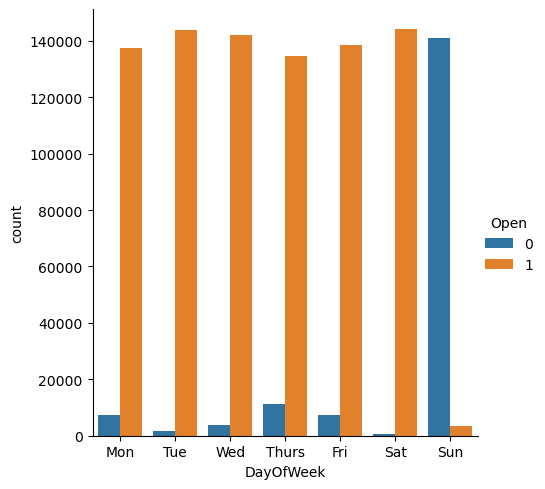

In [107]:
sns.catplot(mtrain_df, x="DayOfWeek", kind="count", hue="Open")
plt.xticks(ticks = list(range(0, 7)), labels=["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

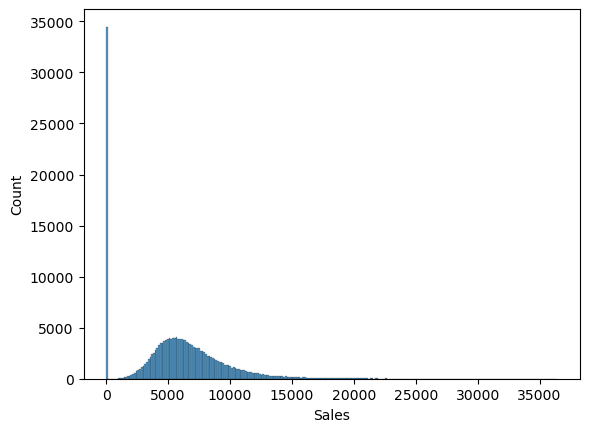

In [116]:
sns.histplot(mtrain_df["Sales"].sample(frac=0.2))

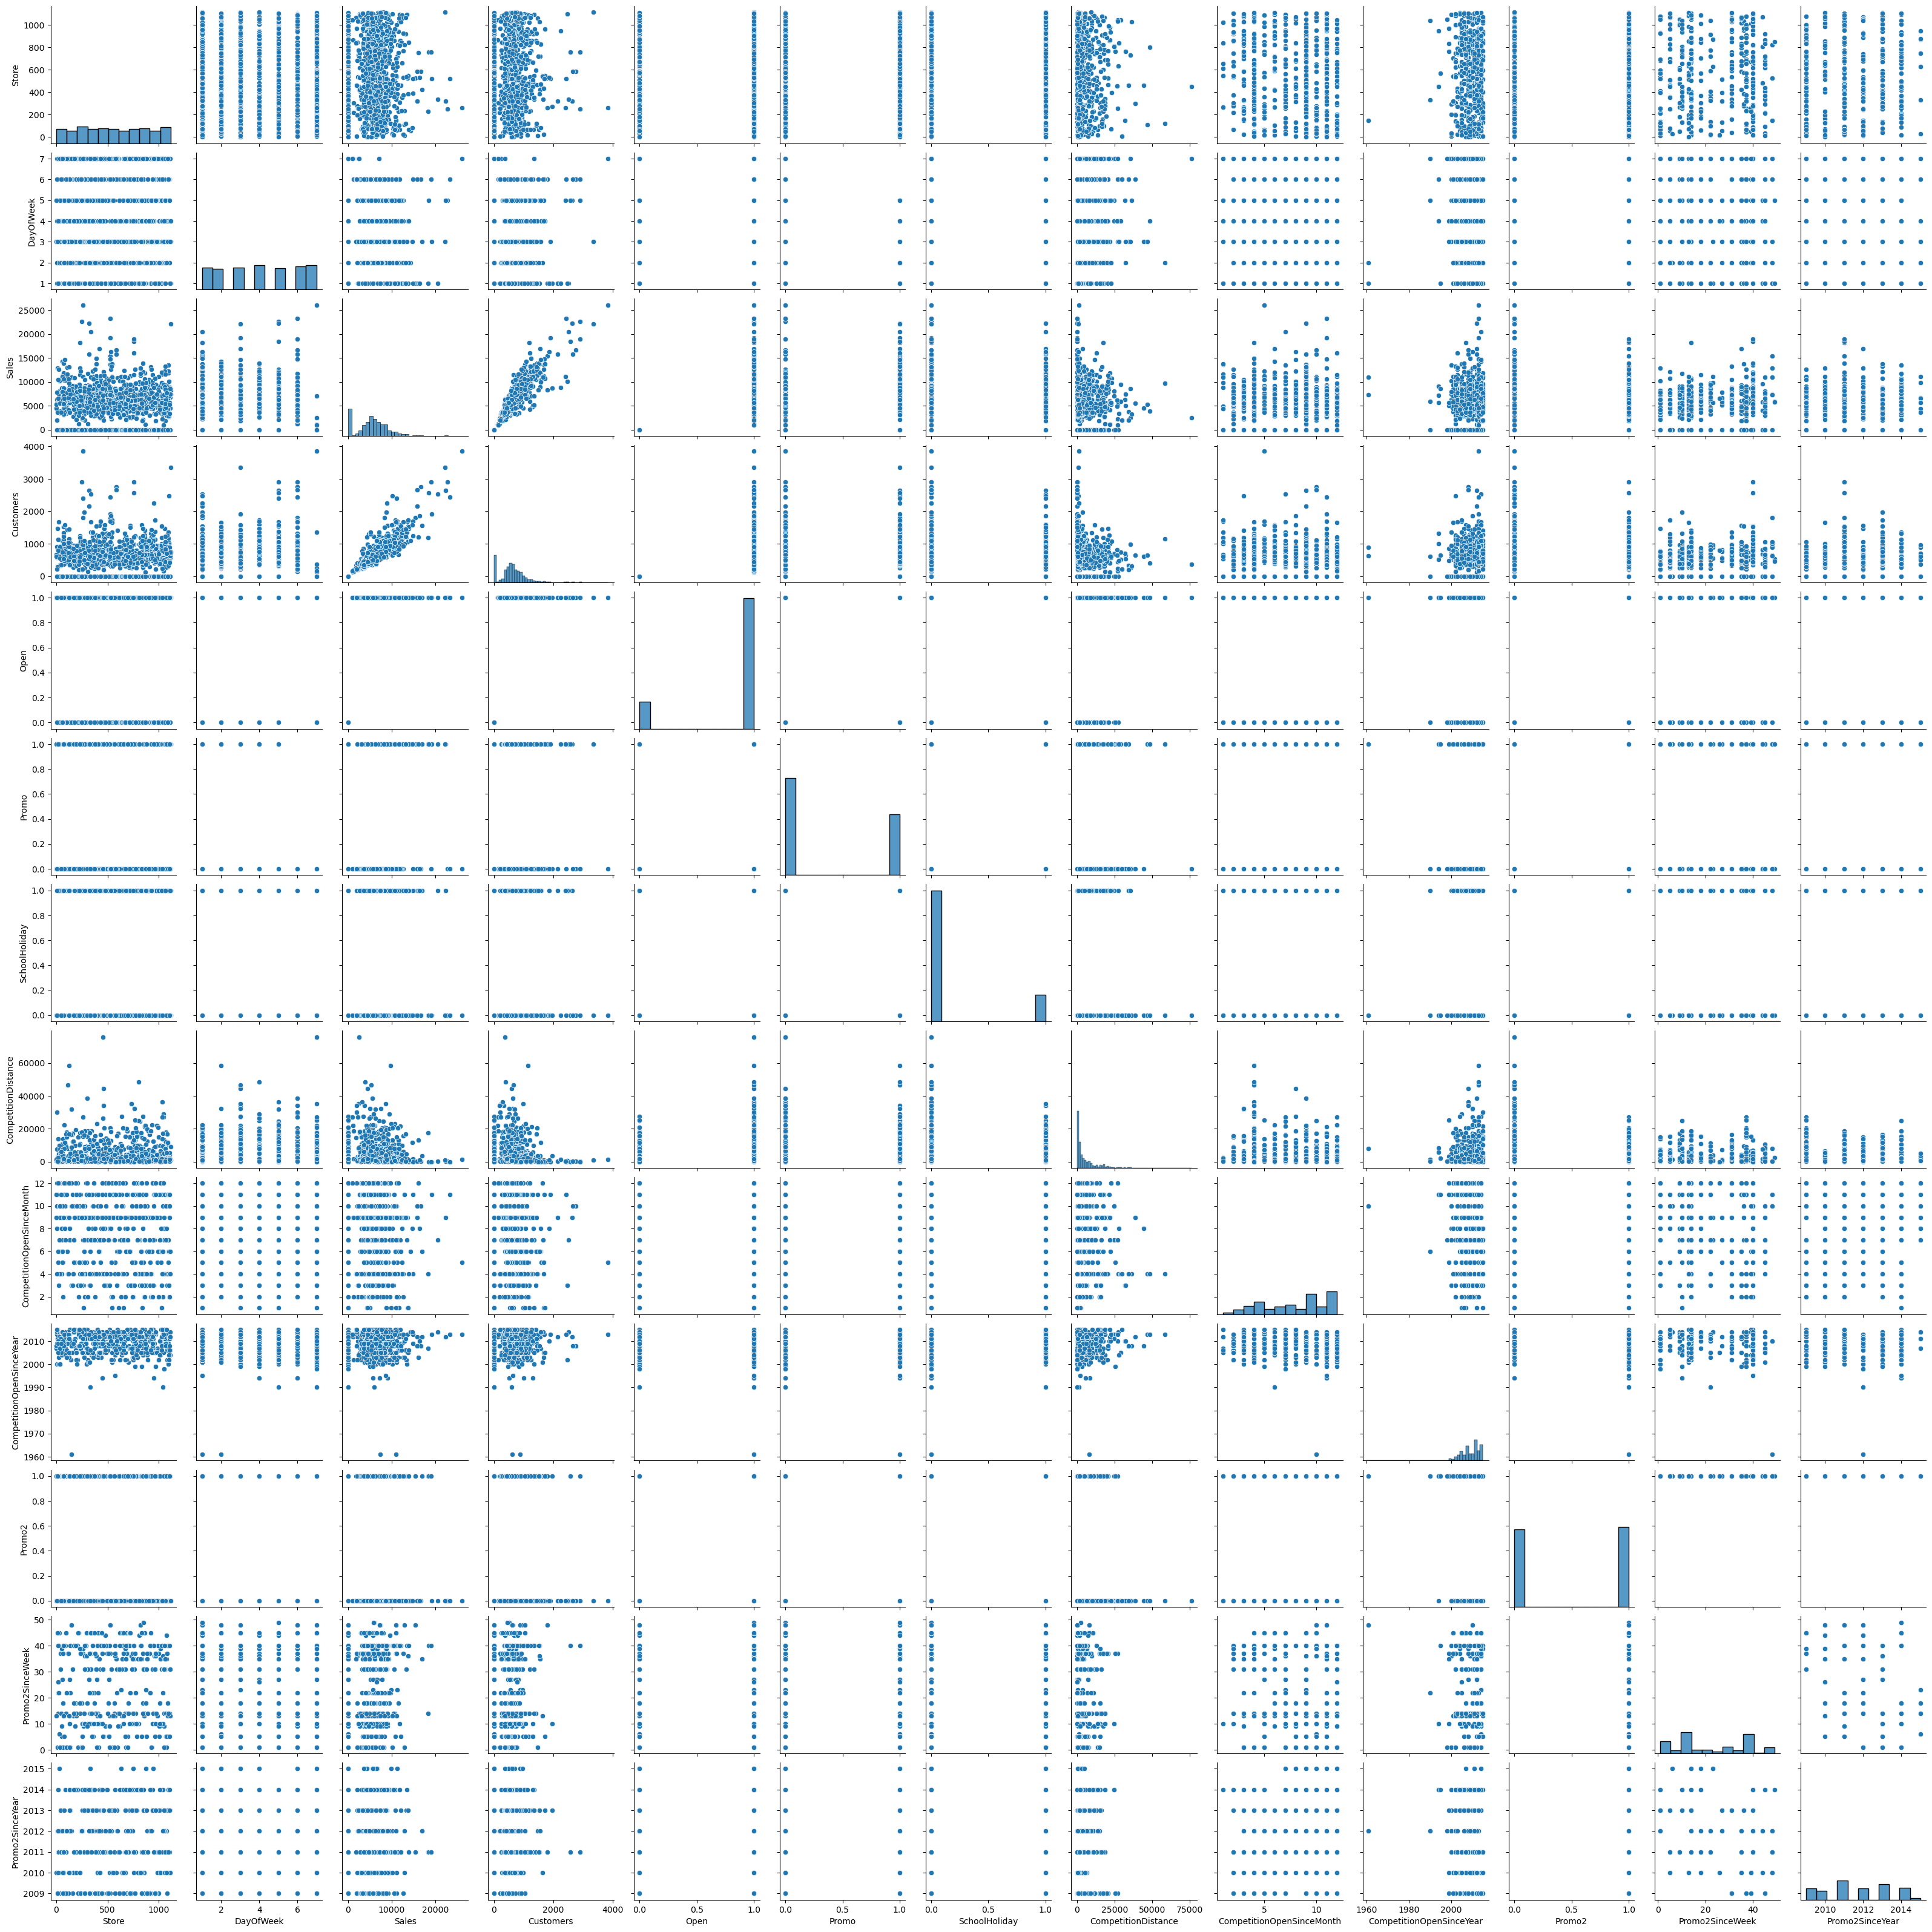

In [115]:
sns.pairplot(mtrain_df.sample(frac=0.001))

In [132]:
def split_date(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df.Date.dt.month
    df["Week"] = df.Date.dt.weekday    
    df["Day"] = df.Date.dt.day  
    df["WeekOfYear"] = df.Date.dt.isocalendar().week
    

In [133]:
split_date(mtrain_df)

In [134]:
split_date(mtest_df)

In [138]:
mtrain_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [141]:
def remove_closed(df):
    df = df[df.Open == 1].copy()

In [143]:
remove_closed(mtrain_df)

In [144]:
remove_closed(mtest_df)

In [146]:
mtrain_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Week,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,7,4,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,4,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,4,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,7,4,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,7,4,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,1,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,1,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,1,1,1,1


In [182]:
mtrain_df[mtrain_df.CompetitionOpenSinceMonth.isna()][["Month", "Sales"]].groupby("Month", as_index=False).mean()

,Month,Sales
0,1,5428.008201
1,2,5623.311609
2,3,5766.610321
3,4,5717.778123
4,5,5485.560932
5,6,5749.455461
6,7,6061.613224
7,8,5663.548288
8,9,5561.707606
9,10,5543.043027


In [186]:
mtrain_df[["CompetitionOpenSinceMonth", "Sales"]].groupby("CompetitionOpenSinceMonth", as_index=False).mean()

,CompetitionOpenSinceMonth,Sales
0,1.0,6172.995021
1,2.0,5429.783060
2,3.0,6018.509804
3,4.0,5721.389568
4,5.0,6253.914209
5,6.0,6355.309018
6,7.0,5605.731231
7,8.0,6242.269193
8,9.0,5674.837021
9,10.0,5672.669411


In [187]:
mtrain_df[~mtrain_df.CompetitionOpenSinceMonth.isna()][["Month", "Sales"]].groupby("Month", as_index=False).mean()

,Month,Sales
0,1,5482.787515
1,2,5655.459859
2,3,5792.937434
3,4,5748.676946
4,5,5491.537451
5,6,5766.318061
6,7,6066.456770
7,8,5706.790911
8,9,5574.237151
9,10,5534.230217


In [153]:
mtrain_df["CompetitionOpenSinceMonth"].nunique()

AttributeError: 'int' object has no attribute 'mean'

In [ ]:
mtrain_df[["CompetitionOpenSinceMonth", ""]].nunique()

In [188]:
def competition_month(df):
    pass